<a href="https://colab.research.google.com/github/garfield-gray/Optimization/blob/main/Convex/Gradient_Projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as la

# 1

In [61]:
def gradientProjection(f, g, Pc, x0, t, epsilon):
  x = x0
  grad = g(x)
  fun_val = f(x)
  p = Pc(x)
  iter = 0
  while la.norm(x-p) > epsilon:
    x = p
    iter = iter + 1
    p = Pc(x - t * grad)
    fun_val = f(p)
    grad = g(p)
    # print('iter_number = {0:3d}'.format(iter),\
    #       'norm_grad = {0:2.6f}'.format(la.norm(grad)),\
    #       'fun_val = {0:2.6f}'.format(fun_val))
  return x, fun_val, iter

# 2

In [62]:
C = np.array([1, 1, 1, 0, 0, 0, -2]) # [a, b, c, d, e, f, g]
A = np.diag([C[0],C[1],C[2]])+0.5*np.array([[0,C[3],C[4]],[C[3],0,C[5]],[C[4],C[5],0]])
F = lambda x: x@A@x + np.prod(x)*C[6]
G = lambda x: 2*A@x + np.array([x[1]*x[2], x[0]*x[2], x[0]*x[1]])*C[6]
Pc = lambda x: np.maximum(x, [-1, -2, -3])
x0 = np.array([-2.0, -1.0, -1.0])

In [74]:
print(gradientProjection(F, G, Pc, x0, 0.1, 1e-10))

(array([-2.5451434e-10, -2.5451434e-10, -2.5451434e-10]), 1.2437289432344766e-19, 95)


# 3

In [78]:
for i in range(1, 14):
    stepsize = 0.01 * i
    print("stepsize: ", stepsize)
    result = gradientProjection(F, G, Pc, x0, stepsize, 1e-10)
    print(result)

stepsize:  0.01
(array([-2.87249836e-09, -2.87249836e-09, -2.87249836e-09]), 2.3773492478554344e-17, 939)
stepsize:  0.02
(array([-1.40927138e-09, -1.40927138e-09, -1.40927138e-09]), 5.491019471841992e-18, 482)
stepsize:  0.03
(array([-9.06207164e-10, -9.06207164e-10, -9.06207164e-10]), 2.176867244482183e-18, 325)
stepsize:  0.04
(array([-7.08357604e-10, -7.08357604e-10, -7.08357604e-10]), 1.2740956401921884e-18, 244)
stepsize:  0.05
(array([-5.7191872e-10, -5.7191872e-10, -5.7191872e-10]), 7.948311855455971e-19, 195)
stepsize:  0.06
(array([-4.77077756e-10, -4.77077756e-10, -4.77077756e-10]), 5.287677192414041e-19, 162)
stepsize:  0.07
(array([-3.61317711e-10, -3.61317711e-10, -3.61317711e-10]), 2.8966542361980224e-19, 139)
stepsize:  0.08
(array([-3.07470589e-10, -3.07470589e-10, -3.07470589e-10]), 2.0011838305938647e-19, 121)
stepsize:  0.09
(array([-3.14726654e-10, -3.14726654e-10, -3.14726654e-10]), 1.9980944238989102e-19, 106)
stepsize:  0.1
(array([-2.5451434e-10, -2.5451434e-10

In [79]:

results = {
    "stepsize": [],
    "gradientProjection_result": []
}


for i in range(1, 14):
    stepsize = 0.01 * i
    print("stepsize: ", stepsize)
    result = gradientProjection(F, G, Pc, x0, stepsize, 1e-10)
    results["stepsize"].append(stepsize)
    results["gradientProjection_result"].append(result[2])


df = pd.DataFrame(results)

# Print the DataFrame
print(df)



stepsize:  0.01
stepsize:  0.02
stepsize:  0.03
stepsize:  0.04
stepsize:  0.05
stepsize:  0.06
stepsize:  0.07
stepsize:  0.08
stepsize:  0.09
stepsize:  0.1
stepsize:  0.11
stepsize:  0.12
stepsize:  0.13
    stepsize  gradientProjection_result
0       0.01                        939
1       0.02                        482
2       0.03                        325
3       0.04                        244
4       0.05                        195
5       0.06                        162
6       0.07                        139
7       0.08                        121
8       0.09                        106
9       0.10                         95
10      0.11                         85
11      0.12                         77
12      0.13                         70


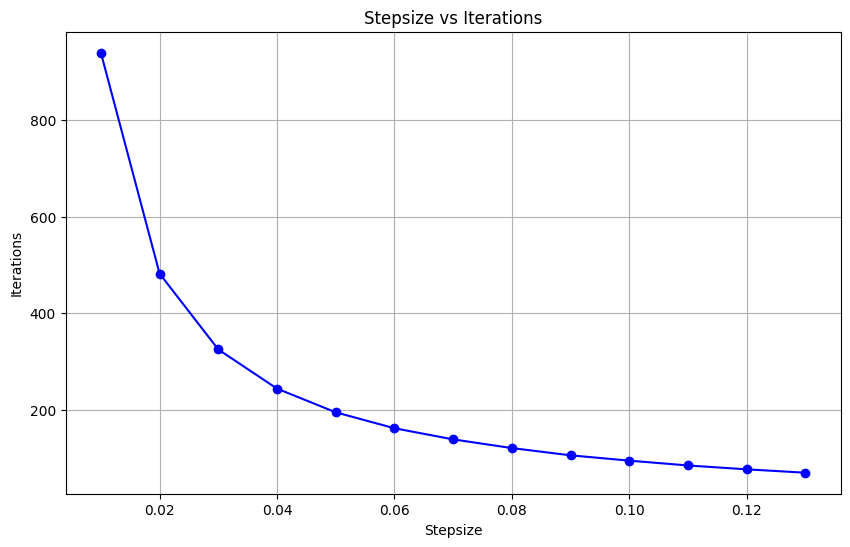

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(df['stepsize'], df['gradientProjection_result'], marker='o', linestyle='-', color='b')
plt.xlabel('Stepsize')
plt.ylabel('Iterations')
plt.title('Stepsize vs Iterations')
plt.grid(True)
plt.show()


# Checking our work

In [81]:
import numpy as np
from scipy.optimize import minimize

# Define the objective function
def objective(x):
    return x[0]**2 + x[1]**2 + x[2]**2 - 2*x[0]*x[1]*x[2]

# Define the bounds for each variable
bounds = [(-1, None), (-2, None), (-3, None)]

# Initial guess
x0 = np.array([-2, -1, -1])

# Run the optimization
result = minimize(objective, x0, method='trust-constr', bounds=bounds)

# Print the results
print("Optimal value:", result.fun)
print("Optimal x:", result.x)
print("Success:", result.success)
print("Message:", result.message)


Optimal value: 1.0555353957191027e-18
Optimal x: [-1.79390055e-10  1.56092240e-10 -9.99494781e-10]
Success: True
Message: `xtol` termination condition is satisfied.


In [82]:
import numpy as np
from scipy.optimize import minimize

# Define the objective function
def objective(x):
    return x[0]**2 + x[1]**2 + x[2]**2 - 2*x[0]*x[1]*x[2]

# Define the bounds for each variable
bounds = [(-1, None), (-2, None), (-3, None)]

# Initial guess
x0 = np.array([-2, -1, -1])

# Run the optimization
result = minimize(objective, x0, method='L-BFGS-B', bounds=bounds)

# Print the results
print("Optimal value:", result.fun)
print("Optimal x:", result.x)
print("Success:", result.success)
print("Message:", result.message)


Optimal value: 1.0845067194536201e-11
Optimal x: [-1.90132002e-06 -1.90132002e-06 -1.90132002e-06]
Success: True
Message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
